### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m,"\n")
t_m=0
j=0
s=["first","second","third","forth"]
for i in range (4):
    c_m=sum(m[:,i])
    t_m=t_m+c_m
    c_m=c_m/3
    if i==3:
        print("the mean of the",s[i],"column is: ",c_m,"\n\n" )
    else:
        print("the mean of the",s[i],"column is: ",c_m )
    if j<3:
        r_m=sum(m[i,:])
        r_m=r_m/4
        print("the mean of the",s[i],"row is: ",r_m,"\n" )
        j=j+1
t_m=t_m/12
print("the mean of the overall is: ",t_m )
      


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

the mean of the first column is:  4.0
the mean of the first row is:  1.5 

the mean of the second column is:  5.0
the mean of the second row is:  5.5 

the mean of the third column is:  6.0
the mean of the third row is:  9.5 

the mean of the forth column is:  7.0 


the mean of the overall is:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [3]:
import numpy as np
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print(np.outer(u,v),"\n")

a=np.array([np.array([u[i]*v]) for i in range(4)]).reshape((4,4))
print(a,"\n")

v=v.reshape(4,1)
b=np.array([i*j for i,j in np.broadcast(u,v)]).reshape((4,4))
print(b)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [5]:
import numpy as np
a=np.array([ np.random.random() for i in range (60) ]).reshape(10,6)
for i in range(10):
    if np.any(a[i,:]<0.1):
        a[i,:]=0
print(a,"\n")

[[0.90940573 0.29005446 0.22800045 0.15931618 0.45824658 0.43306474]
 [0.         0.         0.         0.         0.         0.        ]
 [0.77434558 0.21645824 0.7511574  0.54301835 0.24532024 0.1942405 ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.37360867 0.8181427  0.19384885 0.87140169 0.97281827 0.39996776]
 [0.83241789 0.96820072 0.30045008 0.63910574 0.40887743 0.85403491]
 [0.54853771 0.17859508 0.79223202 0.35217382 0.59015838 0.92634673]
 [0.90298589 0.4960714  0.98877818 0.39015341 0.23424601 0.55766051]
 [0.9242024  0.11848471 0.89293872 0.64723688 0.63419331 0.74703443]
 [0.14772093 0.89131284 0.81169763 0.74663383 0.65111784 0.7399049 ]] 



4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

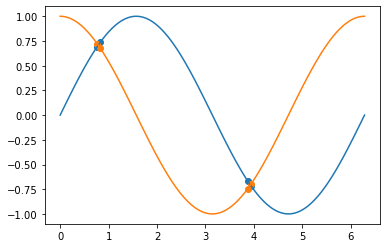

In [6]:
import numpy as np
from math import pi
a=np.linspace(0,2*pi,100)
print(a,"\n")

for i in range(1,11):
    ai=a[(i-1)*10:10*i]
    print("a{} =".format(i),ai,"\n")
    
a_=a[::-1]
print("Reverse the array= ",a_,"\n")

from math import cos,sin
s_c=[]
for i in range(100):
    if abs(sin(a[i])-cos(a[i]))<0.1:
        s_c=s_c+[a[i]]
s_c=np.array(s_c)        
print("elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1=",s_c,"\n")   

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(a,np.sin(a))
plt.plot(a,np.cos(a))
plt.scatter(s_c,np.sin(s_c))
plt.scatter(s_c,np.cos(s_c))
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [22]:
import numpy as np

a = np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape(10,10)
print(a,"\n")

print("trace of matrix:",a.trace(),"\n")

print(np.fliplr(a).diagonal(),"\n")

print(np.diag(a, k=-1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

trace of matrix: 385 

[10 18 24 28 30 30 28 24 18 10] 

[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [41]:
import numpy as np

r66=np.array([0,198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
r66_r=r66.reshape(10,1)
        
        
grid_of_distances_mile=np.array([abs(i-j) for i,j in np.broadcast(r66,r66_r)]).reshape((10,10))
print("grid_of_distances_mile::\n",grid_of_distances_mile,"\n")

grid_of_distances_km=grid_of_distances_mile * 1.60934
print("grid_of_distances_km::\n",grid_of_distances_km,"\n")


grid_of_distances_mile::
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

grid_of_distances_km::
 [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  118

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [10]:
import numpy as np
import timeit

n=100
a = np.arange(0,n)
mask = (a>1)
print("first mask: ",mask,"\n")
m_a=np.array([i*j for i in range(2,n) for j in range(2,n) if i*j<100])
for i in range(2,n):
    for j in range(len(m_a)):
        if a[i]==m_a[j]:
            mask[i]=False
print("second mask: ",mask,"\n")
pm_a=a[mask]
print("ordered prime numbers: ",pm_a,"\n")
%timeit pm_a 
print("\n")

# time for each loop increase with n
#, when n increase n*100 the time for each loop increase 10**(-9)


num=np.arange(0,n)
mask_num = (num>1)
for i in range(2,100):
    if mask_num[i]==True:
        for j in range(i*2,100,i):
            mask_num[j]=False
print("mask_sieve of Eratosthenes : ",mask_num,"\n")
num=num[mask_num] 
print("ordered prime numbers_sieve of Eratosthenes : ",num,"\n")
%timeit num
        

            
            


first mask:  [False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True] 

second mask:  [False False  True  True False  True False  True False False False  True
 False  True False False False  True False  True False False False  True
 False False False False False  True False  True False False False False
 False  True False False False  True False  True False False False  True
 False False False False False  True False False False False False  T

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.